In [1]:
import matplotlib.pyplot as plt
from skimage import data, io, filters
from skimage import color
from skimage import img_as_float
from skimage import novice


/anaconda3/lib/python3.6/site-packages/skimage/novice/__init__.py:103: UserWarning: The `skimage.novice` module was deprecated in version 0.14. It will be removed in 0.16.
  warnings.warn("The `skimage.novice` module was deprecated in version 0.14. "


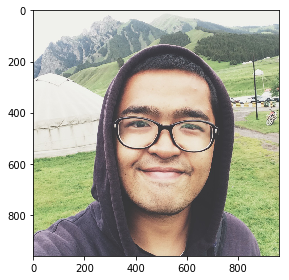

In [2]:
from skimage import novice
img= novice.open('/Users/nurali/Documents/Kuerbanjiang_github/Image-Analysis/Image/c.JPG')
img.show()

In [3]:
from scipy import misc
import scipy.io as sio
from skimage.color import rgb2gray

from scipy.misc import imread
im = imread('/Users/nurali/Documents/Kuerbanjiang_github/Image-Analysis/Image/c.JPG')

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  


In [11]:
from PIL import Image
import numpy as np
colourImg = Image.open('/Users/nurali/Documents/Kuerbanjiang_github/Image-Analysis/Image/c.JPG')
colourPixels = colourImg.convert("RGB")
colourArray = np.array(colourPixels.getdata()).reshape(colourImg.size + (3,))
indicesArray = np.moveaxis(np.indices(colourImg.size), 0, 2)
allArray = np.dstack((indicesArray, colourArray)).reshape((-1, 5))

import pandas as pd
df = pd.DataFrame(allArray, columns=["y", "x", "red","green","blue"])
df.head()

,y,x,red,green,blue
0,0,0,240,241,236
1,0,1,240,241,236
2,0,2,240,241,236
3,0,3,240,241,236
4,0,4,240,241,236


In [12]:
df.describe()

,y,x,red,green,blue
count,921600.000000,921600.000000,921600.000000,921600.000000,921600.000000
mean,479.500000,479.500000,161.045701,158.202307,141.477589
std,277.128129,277.128129,61.741646,61.748688,55.111754
min,0.000000,0.000000,45.000000,45.000000,33.000000
25%,239.750000,239.750000,105.000000,99.000000,98.000000
50%,479.500000,479.500000,173.000000,177.000000,134.000000
75%,719.250000,719.250000,219.000000,209.000000,185.000000
max,959.000000,959.000000,255.000000,250.000000,251.000000


In [4]:
from skimage.color.adapt_rgb import adapt_rgb, each_channel, hsv_value
from skimage import filters
from skimage.color import rgb2gray
img_gray = rgb2gray(im)

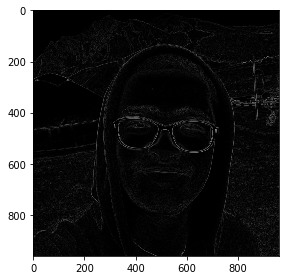

In [6]:
edges = filters.sobel(img_gray)
io.imshow(edges)
io.show()



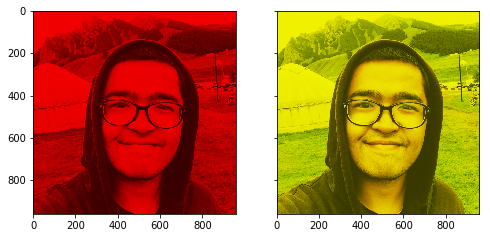

In [7]:
image = color.gray2rgb(im)
red_multiplier = [1, 0, 0]
yellow_multiplier = [1, 1, 0]

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4),
                               sharex=True, sharey=True)
ax1.imshow(red_multiplier * image)
ax2.imshow(yellow_multiplier * image)

/anaconda3/lib/python3.6/site-packages/skimage/color/colorconv.py:275: RuntimeWarning: divide by zero encountered in true_divide
  out[idx, 0] = (arr[idx, 1] - arr[idx, 2]) / delta[idx]
/anaconda3/lib/python3.6/site-packages/skimage/color/colorconv.py:279: RuntimeWarning: divide by zero encountered in true_divide
  out[idx, 0] = 2. + (arr[idx, 2] - arr[idx, 0]) / delta[idx]
/anaconda3/lib/python3.6/site-packages/skimage/color/colorconv.py:283: RuntimeWarning: divide by zero encountered in true_divide
  out[idx, 0] = 4. + (arr[idx, 0] - arr[idx, 1]) / delta[idx]


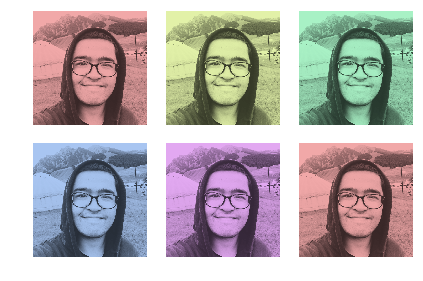

In [8]:
from skimage.filters import rank
import matplotlib.pyplot as plt
from skimage import data
from skimage import color
from skimage import img_as_float


import numpy as np

hue_gradient = np.linspace(0, 1)
hsv = np.ones(shape=(1, len(hue_gradient), 3), dtype=float)
hsv[:, :, 0] = hue_gradient

all_hues = color.hsv2rgb(hsv)

def colorize(image, hue, saturation=1):
    """ Add color of the given hue to an RGB image.

    By default, set the saturation to 1 so that the colors pop!
    """
    hsv = color.rgb2hsv(image)
    hsv[:, :, 1] = saturation
    hsv[:, :, 0] = hue
    return color.hsv2rgb(hsv)

hue_rotations = np.linspace(0, 1, 6)

fig, axes = plt.subplots(nrows=2, ncols=3, sharex=True, sharey=True)

for ax, hue in zip(axes.flat, hue_rotations):
    # Turn down the saturation to give it that vintage look.
    tinted_image = colorize(image, hue, saturation=0.3)
    ax.imshow(tinted_image, vmin=0, vmax=1)
    ax.set_axis_off()
fig.tight_layout()





In [9]:
%matplotlib inline

In [10]:
import matplotlib.pyplot as plt
from skimage import data
from skimage.filters import threshold_otsu

image = image
thresh = threshold_otsu(image)
binary = image > thresh

fig, axes = plt.subplots(ncols=3, figsize=(8, 2.5))
ax = axes.ravel()
ax[0] = plt.subplot(1, 3, 1)
ax[1] = plt.subplot(1, 3, 2)
ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0])

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].hist(image.ravel(), bins=256)
ax[1].set_title('Histogram')
ax[1].axvline(thresh, color='r')

ax[2].imshow(binary, cmap=plt.cm.gray)
ax[2].set_title('Thresholded')
ax[2].axis('off')

plt.show()

/anaconda3/lib/python3.6/site-packages/skimage/filters/thresholding.py:270: UserWarning: threshold_otsu is expected to work correctly only for grayscale images; image shape (960, 960, 3) looks like an RGB image
  warn(msg.format(image.shape))


ValueError: 3-dimensional arrays must be of dtype unsigned byte, unsigned short, float32 or float64

<Figure size 576x180 with 3 Axes>

In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from skimage import data
from skimage.util.dtype import dtype_range
from skimage.util import img_as_ubyte
from skimage import exposure
from skimage.morphology import disk
from skimage.filters import rank


matplotlib.rcParams['font.size'] = 9


def plot_img_and_hist(image, axes, bins=256):
    """Plot an image along with its histogram and cumulative histogram.

    """
    ax_img, ax_hist = axes
    ax_cdf = ax_hist.twinx()

    # Display image
    ax_img.imshow(image, cmap=plt.cm.gray)
    ax_img.set_axis_off()

    # Display histogram
    ax_hist.hist(image.ravel(), bins=bins)
    ax_hist.ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
    ax_hist.set_xlabel('Pixel intensity')

    xmin, xmax = dtype_range[image.dtype.type]
    ax_hist.set_xlim(xmin, xmax)

    # Display cumulative distribution
    img_cdf, bins = exposure.cumulative_distribution(image, bins)
    ax_cdf.plot(bins, img_cdf, 'r')

    return ax_img, ax_hist, ax_cdf